In [2]:
# set up
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# decode the reviews back to English
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_reviews = " ".join(reverse_word_index.get(i - 3, "?") for i in train_data[0])

# encode the integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# vectorize the samples
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
# define the model
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [5]:
# create a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [6]:
# train the model
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7246 - loss: 0.5451 - val_accuracy: 0.8750 - val_loss: 0.3056
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8964 - loss: 0.2687 - val_accuracy: 0.8920 - val_loss: 0.2533
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9286 - loss: 0.1977 - val_accuracy: 0.8860 - val_loss: 0.2699
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9328 - loss: 0.1768 - val_accuracy: 0.8800 - val_loss: 0.2772
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9423 - loss: 0.1502 - val_accuracy: 0.8970 - val_loss: 0.2688
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9593 - loss: 0.1135 - val_accuracy: 0.8890 - val_loss: 0.2901
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.0944 - val_accuracy: 0.8890 - val_loss: 0.2989
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 0.8880 - val_loss

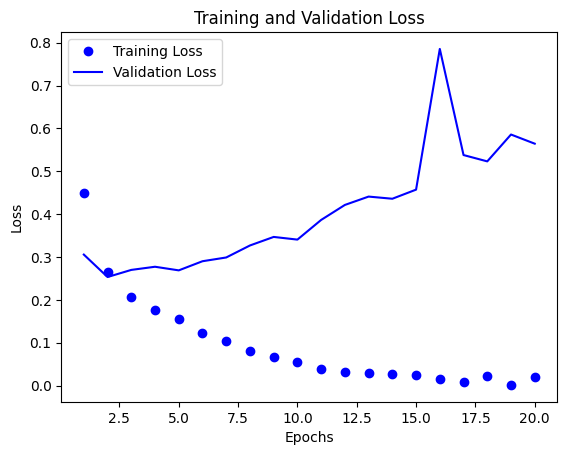

In [7]:
# plot the training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

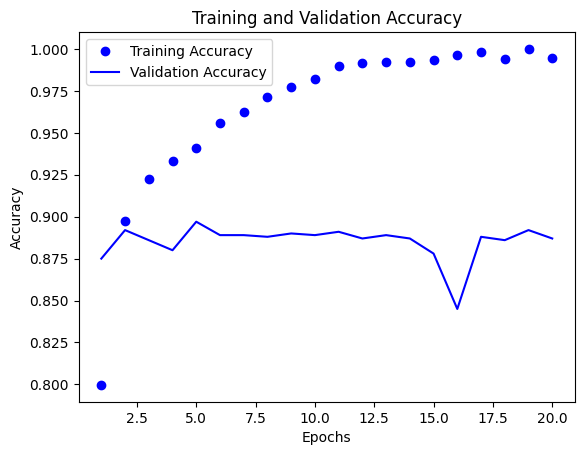

In [14]:
# plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
# retrain the model
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9946 - loss: 0.0276
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9980 - loss: 0.0094
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9994 - loss: 0.0040
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9992 - loss: 0.0052
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9976 - loss: 0.0084
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9999 - loss: 0.0011
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9980 - loss: 0.0073
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9999 - loss: 7.4759e-04
Epoch 9/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 4.4924e-04
Epoch 10/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9888 - loss: 0.0389


In [10]:
# observe the results
results = model.evaluate(x_test, y_test)
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8668 - loss: 0.7794
Loss: 0.764630138874054
Accuracy: 0.8674799799919128


In [13]:
# recreate the model with smaller capacity
model = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# train the model
history_smaller_model = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6758 - loss: 0.6369 - val_accuracy: 0.8422 - val_loss: 0.5163
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8671 - loss: 0.4727 - val_accuracy: 0.8670 - val_loss: 0.4270
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8948 - loss: 0.3819 - val_accuracy: 0.8778 - val_loss: 0.3673
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9127 - loss: 0.3121 - val_accuracy: 0.8862 - val_loss: 0.3275
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9276 - loss: 0.2618 - val_accuracy: 0.8898 - val_loss: 0.3026
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9330 - loss: 0.2312 - val_accuracy: 0.8917 - val_loss: 0.2873
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9438 - loss: 0.1983 - val_accuracy: 0.8922 - val_loss: 0.2789
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9473 - loss: 0.1822 - val_accuracy: 0.8891 - val_loss

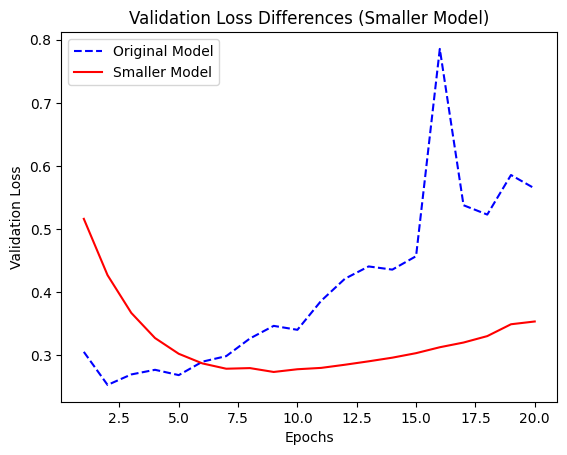

In [26]:
# plot the validation loss differences between the two models
plt.clf()
smaller_dict = history_smaller_model.history
val_loss_values_smaller = smaller_dict["val_loss"]
plt.plot(epochs, val_loss_values, "b--", label="Original Model")
plt.plot(epochs, val_loss_values_smaller, "r", label="Smaller Model")
plt.title("Validation Loss Differences (Smaller Model)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [18]:
# recreate the model with larger capacity
model = Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# train the model
history_larger_model = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6302 - loss: 0.6448 - val_accuracy: 0.7995 - val_loss: 0.4337
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8568 - loss: 0.3481 - val_accuracy: 0.8869 - val_loss: 0.2882
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9180 - loss: 0.2238 - val_accuracy: 0.8450 - val_loss: 0.3803
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9168 - loss: 0.2080 - val_accuracy: 0.8503 - val_loss: 0.3811
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9379 - loss: 0.1565 - val_accuracy: 0.8440 - val_loss: 0.4046
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9640 - loss: 0.1032 - val_accuracy: 0.8808 - val_loss: 0.3326
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9783 - loss: 0.0755 - val_accuracy: 0.8859 - val_loss: 0.3483
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9862 - loss: 0.0514 - val_accuracy: 0.8841 - v

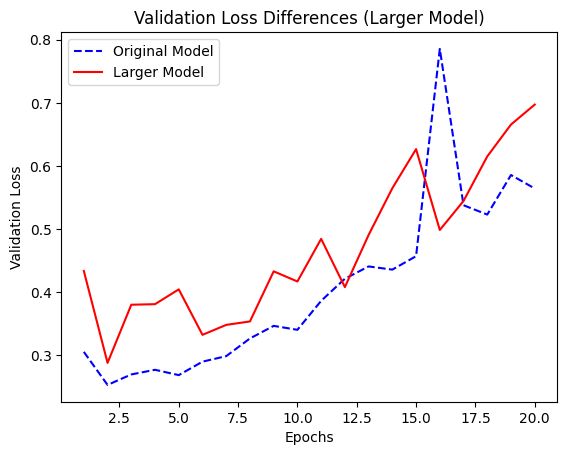

In [25]:
# plot the validation loss differences between the original and the larger models
plt.clf()
large_history = history_larger_model.history
val_loss_values_larger = large_history["val_loss"]
plt.plot(epochs, val_loss_values, "b--", label="Original Model")
plt.plot(epochs, val_loss_values_larger, "r", label="Larger Model")
plt.title("Validation Loss Differences (Larger Model)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [20]:
# recreate the model using L2 weight regularization
from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(16,
          kernel_regularizer=l2(0.002),
          activation="relu"),
    Dense(16,
          kernel_regularizer=l2(0.002),
          activation="relu"),
    Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# train the model
history_l2_reg = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6880 - loss: 0.6838 - val_accuracy: 0.8740 - val_loss: 0.4665
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8985 - loss: 0.4173 - val_accuracy: 0.8829 - val_loss: 0.3918
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9147 - loss: 0.3402 - val_accuracy: 0.8897 - val_loss: 0.3609
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9300 - loss: 0.2908 - val_accuracy: 0.8877 - val_loss: 0.3568
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9361 - loss: 0.2690 - val_accuracy: 0.8564 - val_loss: 0.4210
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9427 - loss: 0.2580 - val_accuracy: 0.8804 - val_loss: 0.3708
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9503 - loss: 0.2345 - val_accuracy: 0.8800 - val_loss: 0.3693
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9545 - loss: 0.2325 - val_accuracy: 0.8788 - val_loss

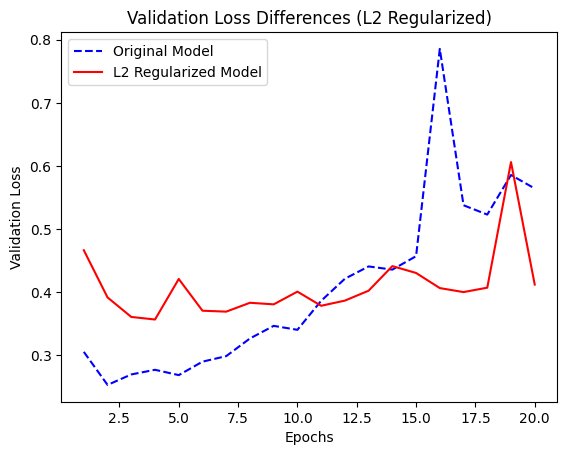

In [24]:
# plot the validation loss differences between the original and the L2 regularized models
plt.clf()
l2_history = history_l2_reg.history
val_loss_values_l2 = l2_history["val_loss"]
plt.plot(epochs, val_loss_values, "b--", label="Original Model")
plt.plot(epochs, val_loss_values_l2, "r", label="L2 Regularized Model")
plt.title("Validation Loss Differences (L2 Regularized)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [22]:
# recreate the model using dropout
from tensorflow.keras.layers import Dropout
model = Sequential([
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# compile the model
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# train the model
history_dropout = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5703 - loss: 0.6739 - val_accuracy: 0.8262 - val_loss: 0.5916
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7234 - loss: 0.5724 - val_accuracy: 0.8636 - val_loss: 0.4778
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7918 - loss: 0.4949 - val_accuracy: 0.8763 - val_loss: 0.4068
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8445 - loss: 0.4227 - val_accuracy: 0.8790 - val_loss: 0.3598
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8730 - loss: 0.3767 - val_accuracy: 0.8886 - val_loss: 0.3223
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8975 - loss: 0.3294 - val_accuracy: 0.8875 - val_loss: 0.3000
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9099 - loss: 0.2997 - val_accuracy: 0.8869 - val_loss: 0.2932
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9274 - loss: 0.2685 - val_accuracy: 0.8891 - val_loss

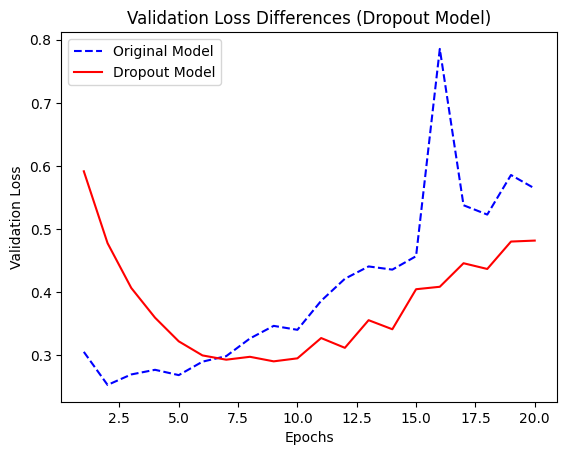

In [27]:
# plot the validation loss differences between the original and the dropout models
plt.clf()
dropout_history = history_dropout.history
val_loss_values_dropout = dropout_history["val_loss"]
plt.plot(epochs, val_loss_values, "b--", label="Original Model")
plt.plot(epochs, val_loss_values_dropout, "r", label="Dropout Model")
plt.title("Validation Loss Differences (Dropout Model)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()